# Tensorflow Training
### produced through training from Zenva
This is a simple linear regression model that draws an average into to a scatterplot.

First thing's first. Let's make sure we have everything installed. We need Tensorflow, matplotlib, and numpy. These can be installed through the powershell terminal using the 'pip install' command.

In [ ]:
#pip install tensorflow
#pip install matplotlib
#This code is for Powershell, not python.

To check if Tensorflow is up to date, you can run the following code in the terminal:

In [ ]:
#pip install --upgrade tensorflow
#This code is for powershell, not python.

Now let's import all of the libraries we need:

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Now let's set some variables and generate random points to be plotted.

In [10]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m*x+b+np.random.randn(*x.shape) +0.25

Let's plot this just to see how it lays out:

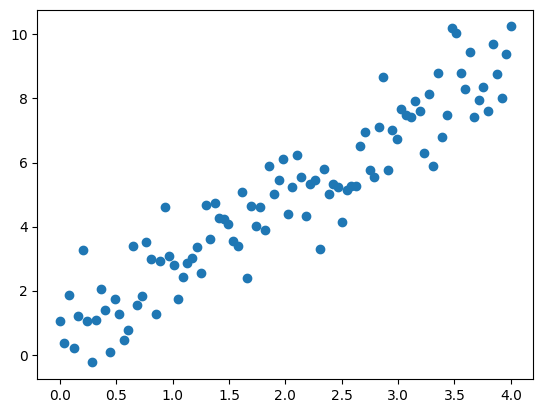

In [11]:
plt.scatter(x,y)

Now we will create a Model class:

In [23]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
    def __call__(self, x):
        return self.weight * x + self.bias

Create a definition to calculate the loss:

In [24]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))
    #this essentially takes the square root of the average

Now create a training function:

In [25]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

Now we can create a for loop that will run {epochs} number of times and print out the loss at each epoch. Lower loss means the model is more accurate.

In [26]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 716.306884765625
Epoch: 1, loss: 508.85418701171875
Epoch: 2, loss: 361.7558288574219
Epoch: 3, loss: 257.42694091796875
Epoch: 4, loss: 183.40965270996094
Epoch: 5, loss: 130.8774871826172
Epoch: 6, loss: 93.57679748535156
Epoch: 7, loss: 67.07635498046875
Epoch: 8, loss: 48.236053466796875
Epoch: 9, loss: 34.8304328918457
Epoch: 10, loss: 25.282020568847656
Epoch: 11, loss: 18.472501754760742
Epoch: 12, loss: 13.60890007019043
Epoch: 13, loss: 10.1287841796875
Epoch: 14, loss: 7.633119583129883
Epoch: 15, loss: 5.838682651519775
Epoch: 16, loss: 4.544363021850586
Epoch: 17, loss: 3.6072750091552734
Epoch: 18, loss: 2.9258241653442383
Epoch: 19, loss: 2.4277186393737793
Epoch: 20, loss: 2.0614593029022217
Epoch: 21, loss: 1.7903155088424683
Epoch: 22, loss: 1.588049054145813
Epoch: 23, loss: 1.4358807802200317
Epoch: 24, loss: 1.3203415870666504
Epoch: 25, loss: 1.2317439317703247
Epoch: 26, loss: 1.1630979776382446
Epoch: 27, loss: 1.1093411445617676
Epoch: 28, loss: 

Here we plot out the weight and bias:

In [27]:
print(model.weight.numpy())
print(model.bias.numpy())

2.1196456
0.6418109


Finally we can generate the average on top of the original scatterplot.

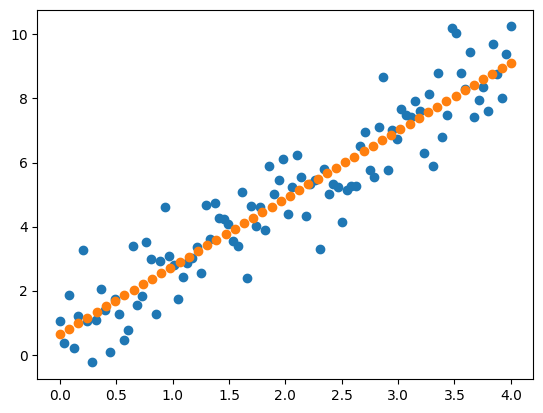

In [29]:
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy()* new_x + model.bias.numpy()
plt.scatter(x,y)
plt.scatter(new_x,new_y)

# End!
### Thanks for checking this out.
Josh Winiarski